In [1]:
##################################################################################################################
# 
#   Seaborn learning rate visualization example
#
#   Author: Philip Bramwell
#   Date: 20 December
# 
#   goal: 
#         * Visualize the costfunction and learning rate
#
#   Index: 
#         1. Libary Imports
#         2. Variable Definition and load Dataset
#         3. Function Defintion
#         4. Visualize Datapoints
#         5. Visualize costfunction
#
##################################################################################################################

## Imports

In [2]:
import pennylane as qml 
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Variables

In [3]:
# creates randomized linearly correlated datapoints 

x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

weights = [0.0, 0.0]

optimizer = qml.GradientDescentOptimizer(0.01)
optimization_steps = 10000

# Functions

In [4]:
def y_prediction(weights):
    return weights[0] * x_values + weights[1]

# mean squared error
def costfunction(weights):
    y_predicted = y_prediction(weights)
    return np.mean((y_values - y_predicted) ** 2)

# Visualize Datapoints

<AxesSubplot:>

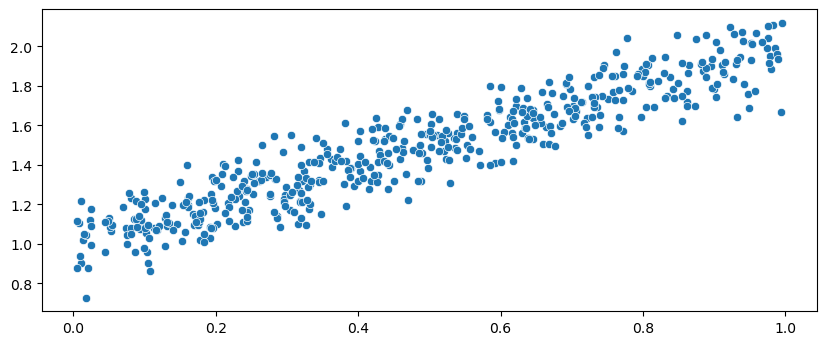

In [5]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x=x_values, y=y_values)

## Visualize the Costfunction

/home/alllowd/anaconda3/envs/quantum/lib/python3.8/site-packages/pennylane/_grad.py:95: UserWarning: Starting with PennyLane v0.20.0, when using Autograd, inputs have to explicitly specify requires_grad=True (or the argnum argument must be passed) in order for trainable parameters to be identified.
  warnings.warn(


(0.01556339017637027, 0.02952909741540407, tensor(2.15281083, requires_grad=True))
(0.603263579852082, 1.0815077121171128, tensor(0.03286812, requires_grad=True))
(0.684998546320339, 1.1490822259268056, tensor(0.01726236, requires_grad=True))
(0.7219745999936006, 1.1391163255268015, tensor(0.01576653, requires_grad=True))
(0.7518873217366048, 1.1246379735942449, tensor(0.01466128, requires_grad=True))
(0.7781729760595568, 1.1113472696579465, tensor(0.01379318, requires_grad=True))
(0.8014560922424715, 1.0995284480534144, tensor(0.01311098, requires_grad=True))
(0.8220946949410902, 1.089048275766843, tensor(0.01257486, requires_grad=True))
(0.8403903668287344, 1.0797575290259807, tensor(0.01215356, requires_grad=True))
(0.8566091798710115, 1.0715214100157002, tensor(0.01182248, requires_grad=True))
(0.870986899551939, 1.0642202195980646, tensor(0.01156229, requires_grad=True))
(0.8837325199057222, 1.057747829987676, tensor(0.01135782, requires_grad=True))
(0.8950313101556914, 1.05201015

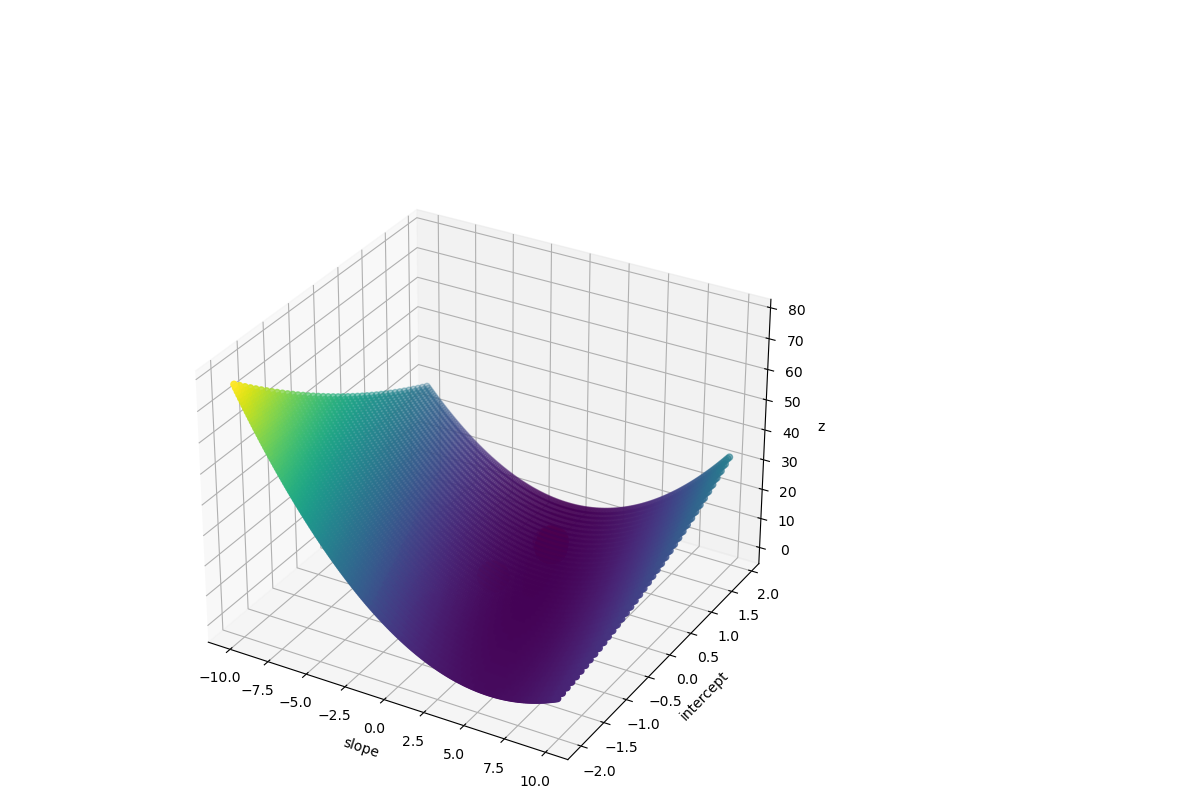

In [6]:
%matplotlib widget

fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_axes([0, 0, 0.8, 0.8], projection='3d')
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('z')

slope_list = []
intercept_list = []
mse_list = []
weight_list_slope = []
weight_list_intercept = []
weight_list_cost = []


for step in range(optimization_steps):
    weights = optimizer.step(costfunction, weights)
    
    if step % 100 == 0:
        weight_list_slope.append(weights[0])       
        weight_list_intercept.append(weights[1])       
        
        costfunct_value = costfunction([weights[0], weights[1]])
                                       
        weight_list_cost.append(costfunct_value)
        print(f'{weights[0], weights[1], costfunction(weights)}')

for m in range(-100, 100):
    for b in range(-20, 20):
        slope_list.append(m / 10)
        intercept_list.append(b / 10)
        mse = costfunction([m / 10, b / 10])
        mse_list.append(mse)
        
ax.scatter(slope_list, intercept_list, mse_list, c=mse_list)
ax.scatter(weight_list_slope, weight_list_intercept, weight_list_cost, c='r', s=500)